# Más allá de Hello World, un ejemplo de visión artificial o computer vision
## M.Sc. Rubén Quispe
En el ejercicio anterior, vio cómo crear una red neuronal que descubrió el problema que estaba tratando de resolver. Esto dio un ejemplo explícito de comportamiento aprendido. Por supuesto, en ese caso, fue un poco exagerado porque hubiera sido más fácil escribir la función Y = 3x + 1 directamente, en lugar de molestarse en usar Machine Learning para aprender la relación entre X e Y para un conjunto fijo de valores, y extendiendo eso para todos los valores.

Pero, ¿qué pasa con un escenario en el que escribir reglas como esa es mucho más difícil, por ejemplo, un problema de visión por computadora? Echemos un vistazo a un escenario en el que podemos reconocer diferentes prendas de vestir, entrenadas a partir de un conjunto de datos que contiene 10 tipos diferentes.

## Start Coding

Let's start with our import of TensorFlow

In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


Entrenaremos una red neuronal para reconocer prendas de ropa de un conjunto de datos común llamado Fashion MNIST. Puede obtener más información sobre este conjunto de datos [aqui](https://github.com/zalandoresearch/fashion-mnist).

Contiene 70.000 prendas de vestir en 10 categorías diferentes. Cada prenda de vestir tiene una imagen en escala de grises de 28x28. Puedes ver algunos ejemplos aquí:

![alt text](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png)

Los datos de Fashion MNIST están disponibles directamente en la API de conjuntos de datos de tf.keras. Lo cargas así:

In [2]:
mnist = tf.keras.datasets.fashion_mnist

Llamar a load_data en este objeto le dará dos conjuntos de dos listas, estos serán los valores de entrenamiento y prueba para los gráficos que contienen las prendas y sus etiquetas.


In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


¿Cómo se ven estos valores? Imprimamos una imagen de entrenamiento y una etiqueta de entrenamiento para ver ... Experimente con diferentes índices en la matriz. Por ejemplo, también eche un vistazo al índice 42 ... es un arranque diferente al del índice 0


9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

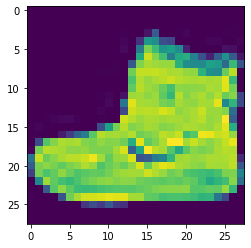

In [4]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

Notarás que todos los valores en el número están entre 0 y 255. Si estamos entrenando una red neuronal, por varias razones es más fácil si tratamos todos los valores entre 0 y 1, un proceso llamado '**normalización**'... y afortunadamente en Python es fácil normalizar una lista como esta sin hacer bucles. Lo haces así:

In [5]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

Ahora puede que te preguntes por qué hay 2 conjuntos ... entrenamiento y prueba. ¿Recuerdas que hablamos de esto en la introducción? La idea es tener 1 conjunto de datos para el entrenamiento, y luego otro conjunto de datos ... que el modelo aún no ha visto ... para ver qué tan bueno sería para clasificar valores. Después de todo, cuando haya terminado, querrá probarlo con datos que no había visto anteriormente.

Diseñemos ahora el modelo. Aquí hay bastantes conceptos nuevos, pero no se preocupe, los dominará. 

In [6]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

**Sequential**: que define una SECUENCIA de capas en la red neuronal

**Flatten**: ¿Recuerdas antes donde nuestras imágenes eran un cuadrado, cuando las imprimiste? Flatten solo toma ese cuadrado y lo convierte en un conjunto de 1 dimensión.

**Dense**: agrega una capa de neuronas

Cada capa de neuronas necesita una **función de activación** que les diga qué hacer. Hay muchas opciones, pero úsalas por ahora.

**Relu** significa efectivamente "Si X> 0 devuelve X, de lo contrario devuelve 0", por lo que lo que hace solo pasa valores 0 o mayores a la siguiente capa de la red.

**Softmax** toma un conjunto de valores y efectivamente elige el más grande, por ejemplo, si la salida de la última capa se ve como [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05 ], te evita tener que pescar en él buscando el mayor valor y lo convierte en [0,0,0,0,1,0,0,0,0] - ¡El objetivo es ahorrar mucho código!


Lo siguiente que debe hacer, ahora que el modelo está definido, es construirlo. Para hacer esto, compilalo con un optimizador y una función de pérdida como antes, y luego lo entrena llamando a **model.fit** pidiéndole que ajuste sus datos de entrenamiento a sus etiquetas de entrenamiento, es decir, que averigüe la relación entre los datos de entrenamiento y sus etiquetas reales, por lo que en el futuro, si tiene datos que se parecen a los datos de entrenamiento, puede hacer una predicción de cómo se verían esos datos. 

In [7]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4983 - accuracy: 0.8237
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3728 - accuracy: 0.8664
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3356 - accuracy: 0.8760
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3118 - accuracy: 0.8856
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2942 - accuracy: 0.8910


Una vez que haya terminado el entrenamiento, debería ver un valor de precisión al final de la época final. Puede parecer algo así como 0.9098. Esto le indica que su red neuronal tiene una precisión del 91% en la clasificación de los datos de entrenamiento. Es decir, descubrió una coincidencia de patrón entre la imagen y las etiquetas que funcionó el 91% del tiempo. No es genial, pero no está mal considerando que solo se entrenó durante 5 épocas y se hizo con bastante rapidez.

Pero, ¿cómo funcionaría con datos invisibles? Por eso tenemos las imágenes de prueba. Podemos llamar model.evaluate y pasar los dos conjuntos, e informará la pérdida para cada uno. Hagamos un intento:

In [8]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3835 - accuracy: 0.8634


[0.38348013162612915, 0.8633999824523926]

Una vez que haya terminado el entrenamiento, debería ver un valor de precisión al final de la época final. Puede parecer algo así como 0.9098. Esto le indica que su red neuronal tiene una precisión del 91% en la clasificación de los datos de entrenamiento. Es decir, descubrió una coincidencia de patrón entre la imagen y las etiquetas que funcionó el 91% del tiempo. No es genial, pero no está mal considerando que solo se entrenó durante 5 épocas y se hizo con bastante rapidez.

Pero, ¿cómo funcionaría con datos invisibles? Por eso tenemos las imágenes de prueba. Podemos llamar model.evaluate y pasar los dos conjuntos, e informará la pérdida para cada uno. Hagamos un intento:


# Exploration Exercises

###Exercise 1:
Para este primer ejercicio, ejecute el siguiente código: Crea un conjunto de clasificaciones para cada una de las imágenes de prueba y luego imprime la primera entrada en las clasificaciones. La salida, después de ejecutarla, es una lista de números. ¿Por qué crees que es así y qué representan esos números? 

In [9]:
classifications = model.predict(test_images)

print(classifications[0])

[1.7079941e-04 6.9629482e-07 6.3433049e-08 3.3166438e-07 3.7461336e-07
 1.4318443e-03 1.1194394e-05 9.7613767e-02 1.7162642e-04 9.0059924e-01]


Sugerencia: intente ejecutar print (test_labels [0]) y obtendrá un 9. ¿Le ayuda eso a comprender por qué esta lista tiene el aspecto que tiene?

In [10]:
print(test_labels[0])

9


### ¿Qué representa esta lista?


1. Son 10 valores aleatorios sin sentido
2. Son las primeras 10 clasificaciones que hizo la computadora
3. Es la probabilidad de que este elemento sea de cada una de las 10 clases

####Responder:
La respuesta correcta es (3)

La salida del modelo es una lista de 10 números. Estos números son una probabilidad de que el valor que se está clasificando sea el valor correspondiente, es decir, el primer valor de la lista es la probabilidad de que la escritura sea un '0', el siguiente sea un '1', etc. Observe que todos son MUY BAJAS probabilidades.

Para el 7, la probabilidad era .999+, es decir, la red neuronal nos dice que es casi seguro que es un 7.

### ¿Cómo sabes que esta lista te dice que el artículo es un botín?


1. No hay suficiente información para responder esa pregunta.
2. El décimo elemento de la lista es el más grande, y el botín tiene la etiqueta 9
2. La bota de tobillo es la etiqueta 9, y hay 0-> 9 elementos en la lista



####Responder
La respuesta correcta es (2). Tanto la lista como las etiquetas se basan en 0, por lo que el botín con la etiqueta 9 significa que es el décimo de las 10 clases. La lista en la que el décimo elemento es el valor más alto significa que la red neuronal ha predicho que el elemento que está clasificando es muy probablemente un botín

##Ejercicio 2:
Veamos ahora las capas de su modelo. Experimente con diferentes valores para la capa densa con 512 neuronas. ¿Qué resultados diferentes obtienes por pérdida, tiempo de entrenamiento, etc.? ¿Por qué crees que ese es el caso?



In [11]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.3.0
Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4683
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3576
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3201
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2949
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.3440
[4.7913460e-07 2.3902711e-08 2.6838375e-08 1.4067922e-09 5.9961579e-08
 4.9186898e-03 4.9062794e-07 3.1837914e-02 1.7163731e-07 9.6324223e-01]
9


### Pregunta 1. Aumento a 1024 neuronas: ¿Cuál es el impacto?

1. El entrenamiento lleva más tiempo, pero es más preciso
2. El entrenamiento lleva más tiempo, pero no afecta la precisión
3. El entrenamiento lleva el mismo tiempo, pero es más preciso


####Responder
La respuesta correcta es (1) al agregar más neuronas, tenemos que hacer más cálculos, lo que ralentiza el proceso, pero en este caso tienen un buen impacto: nos volvemos más precisos. Eso no significa que siempre sea un caso de 'más es mejor', ¡puede alcanzar la ley de rendimientos decrecientes muy rápidamente!

## Ejercicio 3:

¿Qué pasaría si eliminas la capa Flatten ()? ¿Por qué crees que ese es el caso?

Obtiene un error sobre la forma de los datos. Puede parecer vago en este momento, pero refuerza la regla general de que la primera capa de su red debe tener la misma forma que sus datos. En este momento, nuestros datos son imágenes de 28x28, y 28 capas de 28 neuronas serían inviables, por lo que tiene más sentido 'aplanar' esas 28,28 en un 784x1. En lugar de escribir todo el código para manejar eso nosotros mismos, agregamos la capa Flatten () al principio, y cuando las matrices se carguen en el modelo más adelante, automáticamente se aplanarán para nosotros.

In [12]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0


model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# This version has the 'flatten' removed. Replace the above with this one to see the error.
#model = tf.keras.models.Sequential([tf.keras.layers.Dense(64, activation=tf.nn.relu),
#                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.3.0
Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5291
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4007
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3623
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3407
Epoch 5/5
313/313 [==============================] - 0s 898us/step - loss: 0.3779
[1.5652036e-05 4.4177187e-10 8.9750040e-07 7.9066473e-07 2.3513511e-08
 1.9606812e-01 5.3782405e-05 6.1053839e-02 2.2639944e-05 7.4278426e-01]
9


## Ejercicio 4:

Considere las capas finales (de salida). ¿Por qué hay 10 de ellos? ¿Qué pasaría si tuvieras una cantidad diferente a 10? Por ejemplo, intente entrenar la red con 5

Obtiene un error tan pronto como encuentra un valor inesperado. Otra regla general: la cantidad de neuronas en la última capa debe coincidir con la cantidad de clases para las que está clasificando. En este caso, son los dígitos 0-9, por lo que hay 10 de ellos, por lo que debe tener 10 neuronas en su capa final.

In [13]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# Replace the above model definiton with this one to see the network with 5 output layers
# And you'll see errors as a result!
# model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
#                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
#                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.3.0
Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5187
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3923
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3572
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3341
Epoch 5/5
313/313 [==============================] - 0s 924us/step - loss: 0.3636
[1.8511571e-05 9.2030615e-07 1.1095270e-05 1.0560015e-05 4.5484227e-05
 6.0362876e-03 4.7292819e-05 7.2388798e-02 2.9217149e-03 9.1851938e-01]
9


## Ejercicio 5:

Considere los efectos de capas adicionales en la red. ¿Qué pasará si agregas otra capa entre la que tiene 512 y la capa final con 10?

Respuesta: No hay un impacto significativo, porque se trata de datos relativamente simples. Para datos mucho más complejos (incluidas las imágenes en color que se clasificarán como flores que verá en la próxima lección), a menudo se necesitan capas adicionales. 

In [14]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.3.0
Epoch 1/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.4664
Epoch 2/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3561
Epoch 3/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3175
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2964
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3586
[1.88967263e-07 5.32847046e-08 4.41187220e-09 1.20361134e-08
 1.40202046e-08 1.44496001e-03 4.05643981e-08 3.10546393e-03
 1.09865127e-07 9.95449126e-01]
9


# Ejercicio 6:

Considere el impacto del entrenamiento durante más o menos épocas. ¿Por qué crees que sería así?

Pruebe 15 épocas: probablemente obtendrá un modelo con una pérdida mucho mejor que el que tiene 5
Pruebe 30 épocas; es posible que vea que el valor de pérdida deja de disminuir y, a veces, aumenta. Este es un efecto secundario de algo llamado "sobreajuste" del que puede aprender [en algún lugar] y es algo que debe tener en cuenta al entrenar redes neuronales. No tiene sentido perder el tiempo entrenando si no está mejorando su pérdida, ¿verdad? :)

In [15]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=30)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

2.3.0
Epoch 1/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4967
Epoch 2/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3781
Epoch 3/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3391
Epoch 4/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3153
Epoch 5/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2951
Epoch 6/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2807
Epoch 7/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2680
Epoch 8/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2571
Epoch 9/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2463
Epoch 10/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2393
Epoch 11/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2307
Epoch 12/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.

# Ejercicio 7:

Antes de entrenar, normalizó los datos, pasando de valores que eran 0-255 a valores que eran 0-1. ¿Cuál sería el impacto de eliminar eso? Aquí está el código completo para probarlo. ¿Por qué crees que obtienes resultados diferentes?

In [16]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
# To experiment with removing normalization, comment out the following 2 lines
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

2.3.0
Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4757
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3580
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3226
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2981
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3398
[1.2204147e-07 1.4669310e-09 4.8622578e-08 6.9037448e-08 1.0673590e-08
 1.5880926e-02 1.3612033e-07 3.9595626e-03 5.5817191e-06 9.8015356e-01]
9


# Ejercicio 8:

Antes, cuando entrenó para épocas adicionales, tuvo un problema en el que su pérdida podría cambiar. Es posible que te haya llevado un poco de tiempo esperar a que el entrenamiento lo haga, y quizás hayas pensado '¿no sería bueno si pudiera detener el entrenamiento cuando alcance el valor deseado?' - es decir, el 95% de precisión podría ser suficiente para ti, y si lo alcanzas después de 3 épocas, ¿por qué quedarte esperando a que termine muchas más épocas? Como cualquier otro programa ... ¡tienes devoluciones de llamada! Veámoslos en acción ...

In [20]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')> 0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])




2.3.0
Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4766 - accuracy: 0.8293
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3557 - accuracy: 0.8689
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3218 - accuracy: 0.8819
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2991 - accuracy: 0.8911
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2782 - accuracy: 0.8976
